## Linear Regression 1D: Prediction

In [153]:
# These are the libraries will be used for this lab.
import torch

In [154]:
# Define w = 2 and b = -1 for y = wx + b
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)
w, b

(tensor(2., requires_grad=True), tensor(-1., requires_grad=True))

In [155]:
# Function forward(x) for prediction
def forward(x):
  yhat = w*x+b
  return yhat

In [156]:
# Predict y = 2x - 1 at x = 1
x = torch.tensor([[1.0]])
yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.]], grad_fn=<AddBackward0>)


In [157]:
# Create x Tensor and check the shape of x tensor
x = torch.tensor([[1.0], [2.0]])
print("The shape of x: ", x.shape)

The shape of x:  torch.Size([2, 1])


In [158]:
# Make the prediction of y = 2x - 1 at x = [1, 2]
yhat = forward(x)
print("Prediction: ", yhat)

Prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


In [159]:
# Practice: Make a prediction of y = 2x - 1 at x = [[1.0], [2.0], [3.0]]
x = torch.tensor([[1.0], [2.0], [3.0]])
yhat= forward(x)
print("Prediction: ", yhat)

Prediction:  tensor([[1.],
        [3.],
        [5.]], grad_fn=<AddBackward0>)


## Class Linear

In [160]:
# Import Class Linear
from torch.nn import Linear

In [161]:
# Set random seed
torch.manual_seed(1)

In [162]:
# Create Linear Regression Model, and print out the parameters
lr = Linear(in_features=1, out_features=1, bias=True)
print("Model Parameters w and b: ", list(lr.parameters()))

Model Parameters w and b:  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [163]:
print("Python dictionery: ", lr.state_dict())
print("Python dictionery Keys: ", lr.state_dict().keys())
print("Python dictionery Values: ", lr.state_dict().values())

Python dictionery:  OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])
Python dictionery Keys:  odict_keys(['weight', 'bias'])
Python dictionery Values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])


In [164]:
print("weight: ", lr.weight)
print("bias: ", lr.bias)

weight:  Parameter containing:
tensor([[0.5153]], requires_grad=True)
bias:  Parameter containing:
tensor([-0.4414], requires_grad=True)


In [165]:
# Make the prediction at x = [[1.0]]
x = torch.tensor([[1.0]])
yhat = lr(x)
print("prediction: ", yhat)

prediction:  tensor([[0.0739]], grad_fn=<AddmmBackward0>)


In [166]:
# Create the prediction using linear model
x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("Prediction: ", yhat)

Prediction:  tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


In [167]:
# Practice: Use the linear regression model object lr to make the prediction.
x = torch.tensor([[1.], [2.], [3.]])
yhat = lr(x)
print("Prediction: ", yhat)

Prediction:  tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward0>)


## Build Custom Modules

In [168]:
# Library for this section
from torch import nn

In [169]:
# Customize Linear Regression Class
class LR(nn.Module):

  # Constructor
  def __init__(self, input_size, output_size):
    # Inherit from parent
    super(LR, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  # Prediction function
  def forward(self, x):
    out = self.linear(x)
    return out

In [170]:
# Create the linear regression model. Print out the parameters.
lr = LR(1, 1)
print("Model Parameters: ", list(lr.parameters()))
print("Liear Model: ", lr.linear)

Model Parameters:  [Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]
Liear Model:  Linear(in_features=1, out_features=1, bias=True)


In [171]:
# Try our customize linear regression model with single input
x = torch.tensor([[1.0]])
yhat = lr(x)
print("Prediction: ", yhat)

Prediction:  tensor([[0.2755]], grad_fn=<AddmmBackward0>)


In [172]:
# Try our customize linear regression model with multiple input
x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("prediction: ", (yhat))

prediction:  tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward0>)


In [173]:
print("Model Dictinoery: ", lr.state_dict())
print("Keys: ", lr.state_dict().keys())
print("Values: ", lr.state_dict().values())

Model Dictinoery:  OrderedDict([('linear.weight', tensor([[-0.1939]])), ('linear.bias', tensor([0.4694]))])
Keys:  odict_keys(['linear.weight', 'linear.bias'])
Values:  odict_values([tensor([[-0.1939]]), tensor([0.4694])])


In [174]:
# Practice: Use the LR class to create a model and make a prediction of the following tensor.
x = torch.tensor([[1.0], [2.0], [3.0]])
lr1 = LR(1, 1)
yhat = lr1(x)
print("yhat: ", yhat)

yhat:  tensor([[-0.3417],
        [-1.2832],
        [-2.2246]], grad_fn=<AddmmBackward0>)


## Linear Regression 1D: Training One Parameter

In [175]:
# These are the libraries will be used for this lab.
import numpy as np
import matplotlib.pyplot as plt

In [176]:
# The class for plotting
class plot_diagram():

  # Constructor
  def __init__(self, X, Y, w, stop, go=False):
    start = w.data
    self.error = []
    self.parameter = []
    print(type(X.numpy))
    self.X = X.numpy()

    self.Y = Y.numpy()
    self.parameter_values = torch.arange(start, stop)
    self.loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
    w.data = start

  # Executor
  def __call__(self, yhat, w, error, n):
    self.error.append(error)
    self.parameter.append(w.data)
    plt.subplot(212)
    plt.plot(self.X, yhat.detach().numpy())
    plt.plot(self.X, self.Y, 'ro')
    plt.xlabel("A")
    plt.ylim(-20, 20)
    plt.subplot(211)
    plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))

    # Convert lists to pytorch tensors
    parameter_values_tensor = torch.tensor(self.parameter_values)
    loss_function_tensor = torch.tensor(self.loss_function)

    # Plot using the tensors
    plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())

    plt.plot(self.parameter, self.error, 'ro')
    plt.xlabel("B")
    plt.figure()

    # Destructor
    def __del__(self):
      plt.close('all')

In [177]:
# Import the library PyTorch
import torch

In [178]:
# Create the f(X) with a slope of -3
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

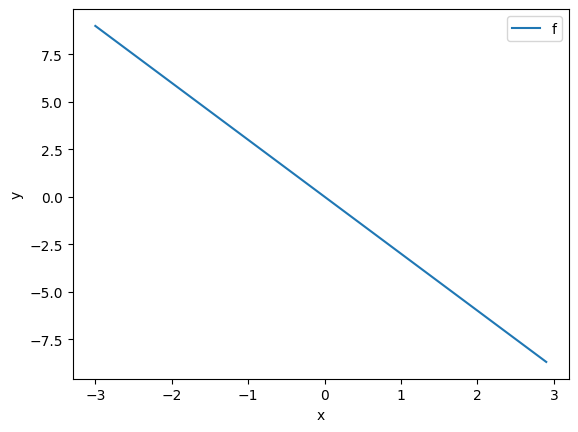

In [179]:
# Plot the line with blue
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [180]:
# Add some noise to f(X) and save it in Y
Y = f + 0.1 * torch.randn(X.size())

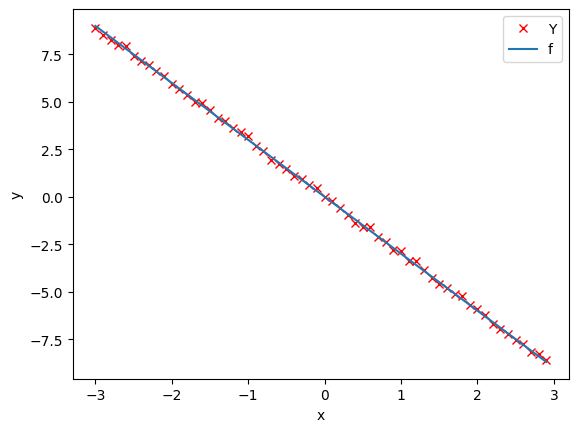

In [181]:
# Plot the data points
plt.plot(X.numpy(), Y.numpy(), 'rx', label='Y')
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [182]:
# Create forward function for prediction
def forward(x):
  return w * x

In [183]:
# Create the MSE function for evaluate the result.
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

In [184]:
# Create Learning Rate and an empty list to record the loss for each iteration
lr = 0.1
loss_l = []

In [185]:
w = torch.tensor(-10.0, requires_grad=True)

In [186]:
gradientplot = plot_diagram(X, Y, w, stop=5)

<class 'builtin_function_or_method'>


In [187]:
# Define a function for train the model
def train_model(iter):
  for epoch in range(iter):

    # make the prediction as we learned in the last lab
    yhat = forward(X)

    # calculate the iteration
    loss = criterion(yhat, Y)

    # plot the diagram for us to have a better idea
    gradientplot(yhat, w, loss.item(), epoch)

    # store loss into a list
    loss_l.append(loss.item())

    # backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()

    # updata parameters
    w.data = w.data - lr * w.grad.data

    # zero the gradients before running the backward pass
    w.grad.data.zero_()


<ipython-input-176-27ea5ec8bd00>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


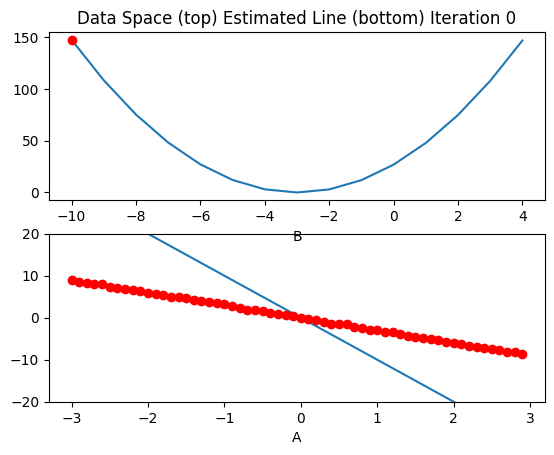

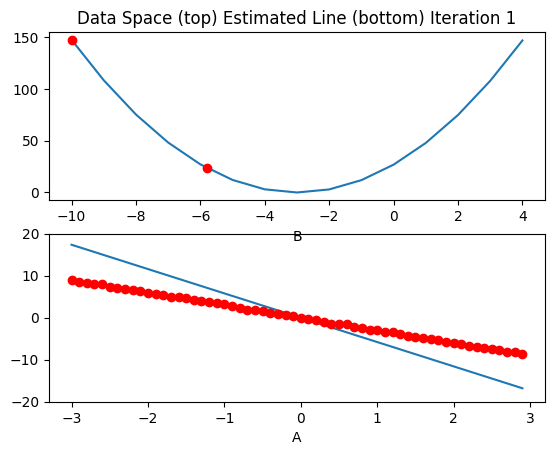

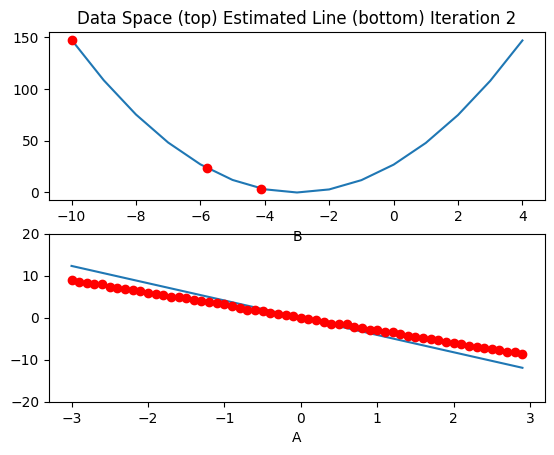

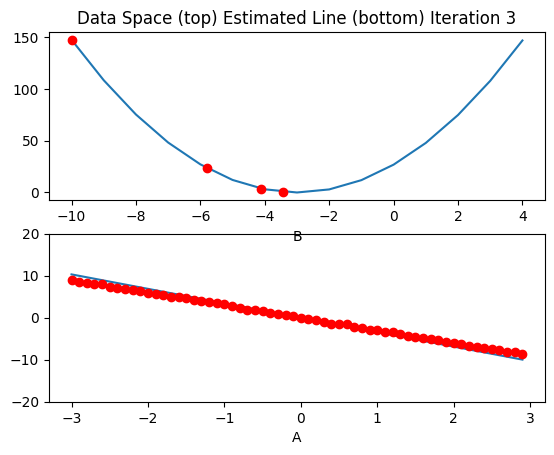

<Figure size 640x480 with 0 Axes>

In [188]:
# Give 4 iterations for training the model here.
train_model(4)

[147.43820190429688, 23.55866241455078, 3.7709543704986572, 0.610196053981781]


Text(38.347222222222214, 0.5, 'Cost')

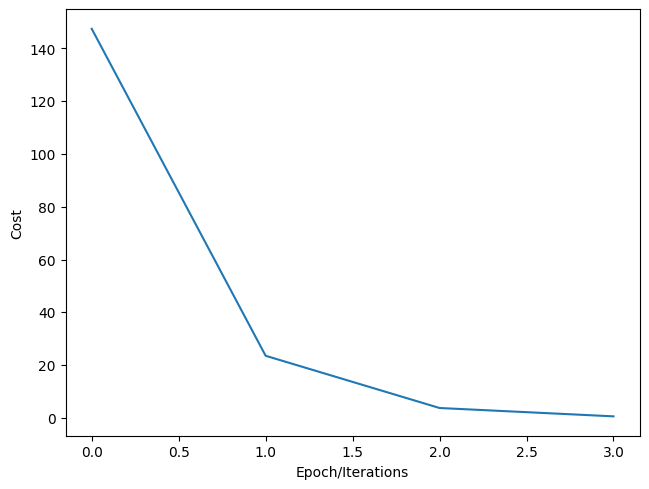

In [189]:
# Plot the loss for each iteration
print(loss_l)
plt.plot(loss_l)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [190]:
# Practice: Create w with the inital value of -15.0
w = torch.tensor(-15.0, requires_grad=True)

In [191]:
# Practice: Create LOSS2 list
LOSS2 = []
gradient_plot1 = plot_diagram(X, Y, w, stop=15)

<class 'builtin_function_or_method'>


<ipython-input-176-27ea5ec8bd00>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


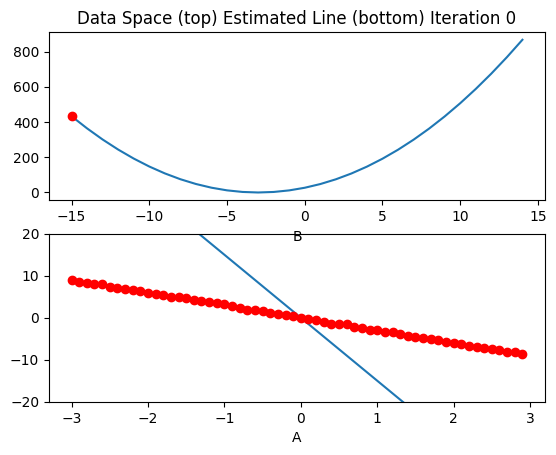

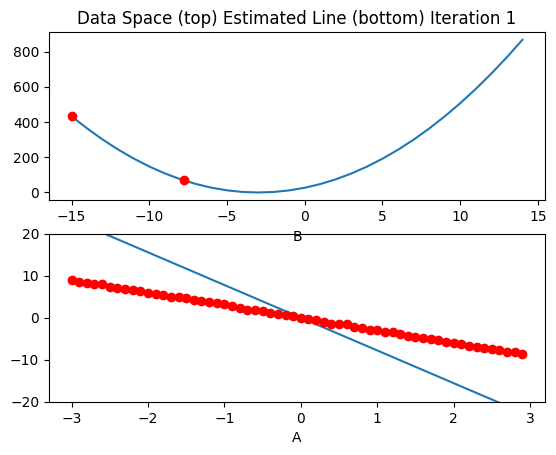

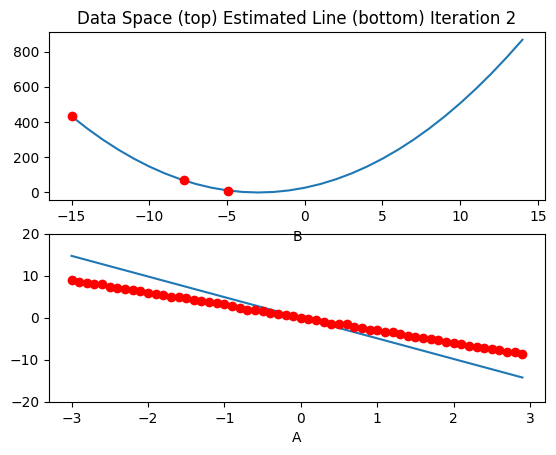

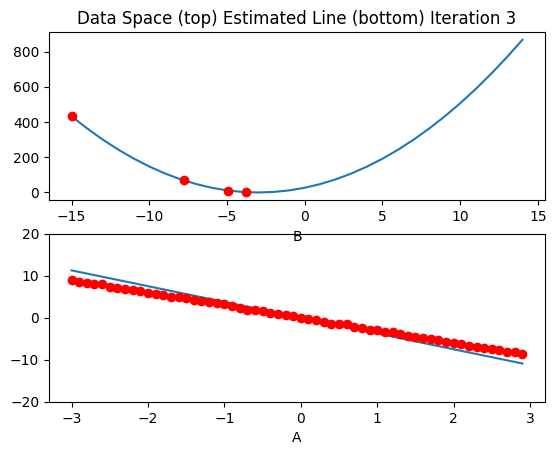

<Figure size 640x480 with 0 Axes>

In [192]:
def my_train_model(iteration):
  for epoch in range(iteration):
    yhat = forward(X)
    loss = criterion(yhat, Y)
    gradient_plot1(yhat, w, loss.item(), epoch)
    LOSS2.append(loss.item())
    loss.backward()
    w.data = w.data-lr*w.grad.data
    w.grad.data.zero_()
my_train_model(4)

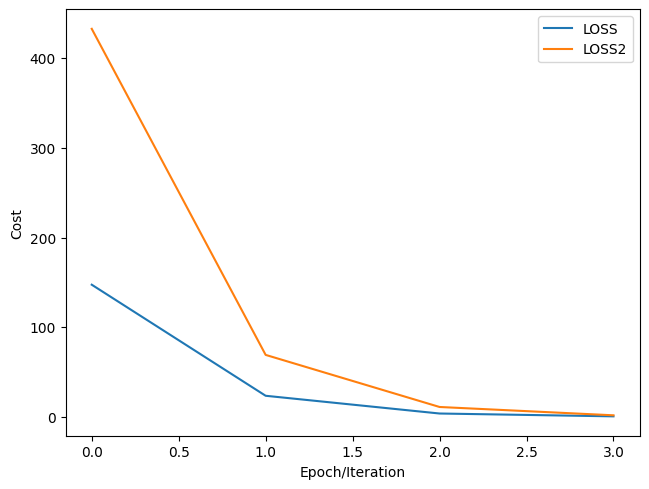

In [194]:
# Practice: Plot the list LOSS2 and LOSS
plt.plot(loss_l, label="LOSS")
plt.plot(LOSS2, label="LOSS2")
plt.tight_layout()
plt.xlabel('Epoch/Iteration')
plt.ylabel('Cost')
plt.legend()

## Linear regression 1D: Training Two Parameter

In [195]:
# These are the libraries we are going to use in the lab.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [196]:
# The class for plot the diagram
class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [197]:
# Import PyTorch library
import torch

In [199]:
# Create f(X) with a slope of 1 and a bias of -1
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
X, f

(tensor([[-3.0000e+00],
         [-2.9000e+00],
         [-2.8000e+00],
         [-2.7000e+00],
         [-2.6000e+00],
         [-2.5000e+00],
         [-2.4000e+00],
         [-2.3000e+00],
         [-2.2000e+00],
         [-2.1000e+00],
         [-2.0000e+00],
         [-1.9000e+00],
         [-1.8000e+00],
         [-1.7000e+00],
         [-1.6000e+00],
         [-1.5000e+00],
         [-1.4000e+00],
         [-1.3000e+00],
         [-1.2000e+00],
         [-1.1000e+00],
         [-1.0000e+00],
         [-9.0000e-01],
         [-8.0000e-01],
         [-7.0000e-01],
         [-6.0000e-01],
         [-5.0000e-01],
         [-4.0000e-01],
         [-3.0000e-01],
         [-2.0000e-01],
         [-1.0000e-01],
         [-2.3842e-08],
         [ 1.0000e-01],
         [ 2.0000e-01],
         [ 3.0000e-01],
         [ 4.0000e-01],
         [ 5.0000e-01],
         [ 6.0000e-01],
         [ 7.0000e-01],
         [ 8.0000e-01],
         [ 9.0000e-01],
         [ 1.0000e+00],
         [ 1.100

In [200]:
# Add noise
y = f + 0.1 * torch.randn(X.size())
y

tensor([[-4.0654e+00],
        [-3.8268e+00],
        [-3.9434e+00],
        [-3.7501e+00],
        [-3.5828e+00],
        [-3.5160e+00],
        [-3.4505e+00],
        [-3.4475e+00],
        [-3.3041e+00],
        [-3.0268e+00],
        [-3.1048e+00],
        [-2.9471e+00],
        [-2.7709e+00],
        [-2.5009e+00],
        [-2.6925e+00],
        [-2.5930e+00],
        [-2.3183e+00],
        [-2.3914e+00],
        [-2.0615e+00],
        [-2.1814e+00],
        [-2.0928e+00],
        [-1.7888e+00],
        [-1.7384e+00],
        [-1.6806e+00],
        [-1.6103e+00],
        [-1.5151e+00],
        [-1.6102e+00],
        [-1.3620e+00],
        [-1.3478e+00],
        [-1.2133e+00],
        [-1.0101e+00],
        [-8.6566e-01],
        [-6.7142e-01],
        [-6.1832e-01],
        [-5.7947e-01],
        [-4.6949e-01],
        [-3.4643e-01],
        [-3.4312e-01],
        [-1.8427e-01],
        [ 2.5396e-02],
        [-1.3472e-03],
        [ 2.8606e-01],
        [ 1.9594e-03],
        [ 4

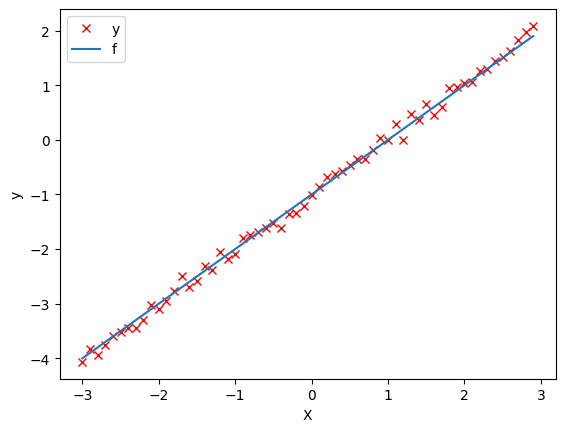

In [204]:
# Plot out the line and the points with noise
plt.plot(X.numpy(), y.numpy(), 'rx', label='y')
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [214]:
# Define the forward function
def forward(X):
  return w * X + b

In [215]:
# Define the MSE Loss function
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

<Figure size 640x480 with 0 Axes>

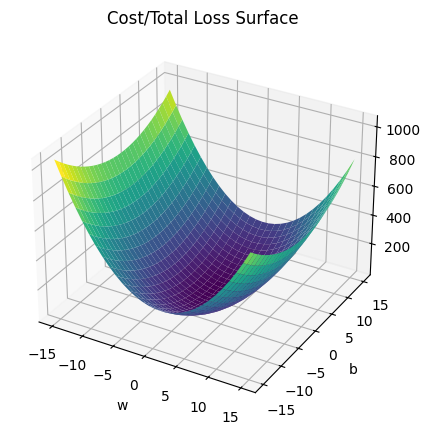

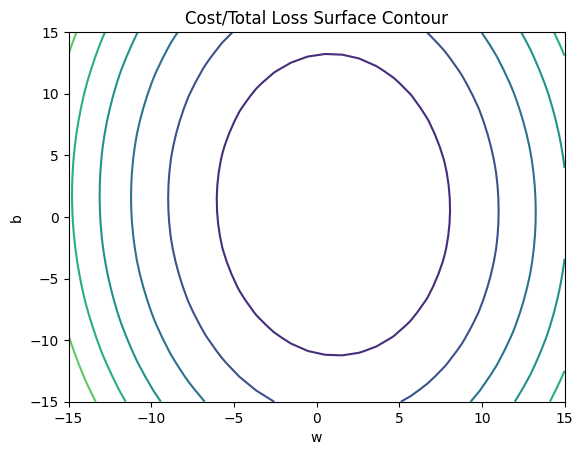

In [216]:
# Create plot_error_surfaces for viewing the data
get_surface = plot_error_surfaces(15, 15, X, y, 30)

In [217]:
# Define the parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

In [218]:
# Define learning rate and create an empty list for containing the loss for each iteration.
lr=0.1
LOSS1=[]

In [219]:
# The function for training the model
def train_model(iter):
  # Loop
  for epoch in range(iter):

    # make a prediction
    yhat = forward(X)

    # calculate the loss
    loss = criterion(yhat, y)

    # Section for plotting
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    if epoch % 3 == 0:
      get_surface.plot_ps()

    # store the loss in the list LOSS
    LOSS1.append(loss.item())

    # backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()

    # update parameters slope and bias
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data

    # zero the gradients before running the backward pass
    w.grad.data.zero_()
    b.grad.data.zero_()

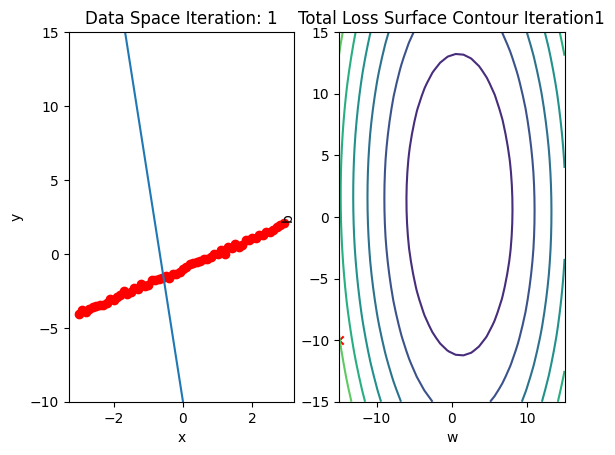

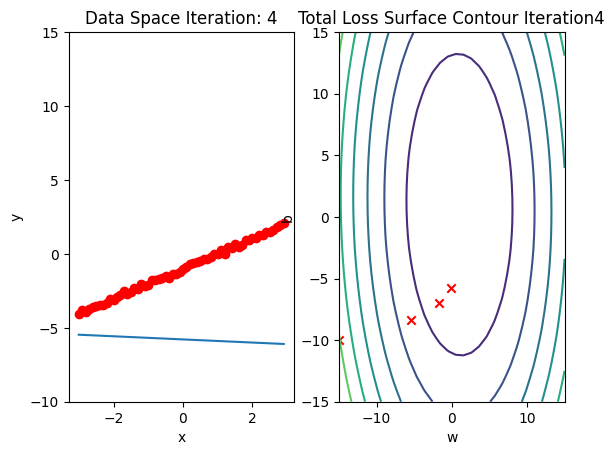

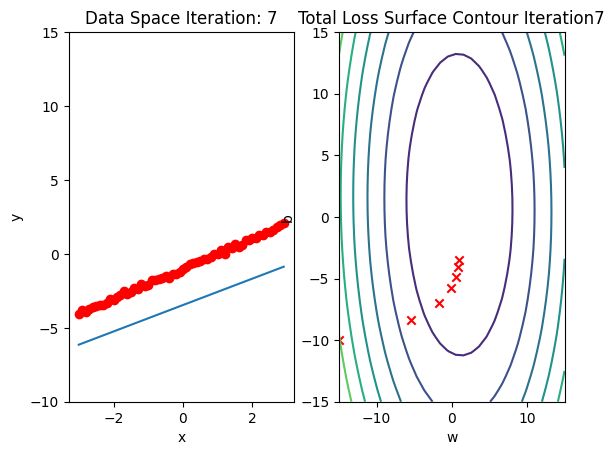

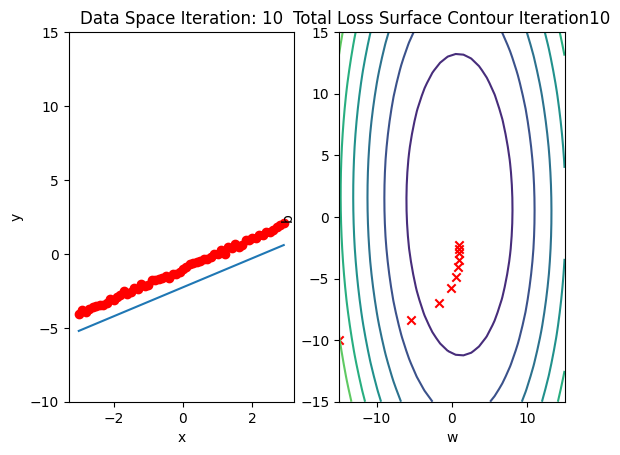

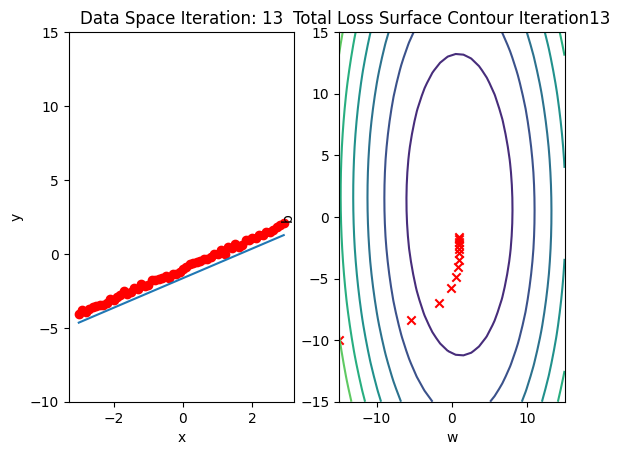

In [220]:
train_model(15)

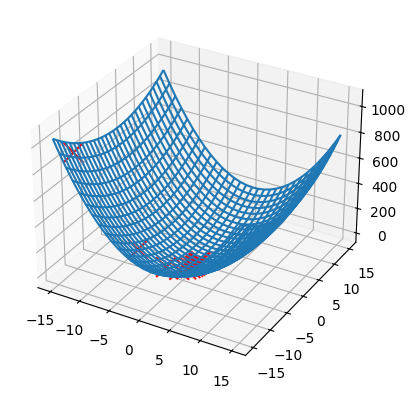

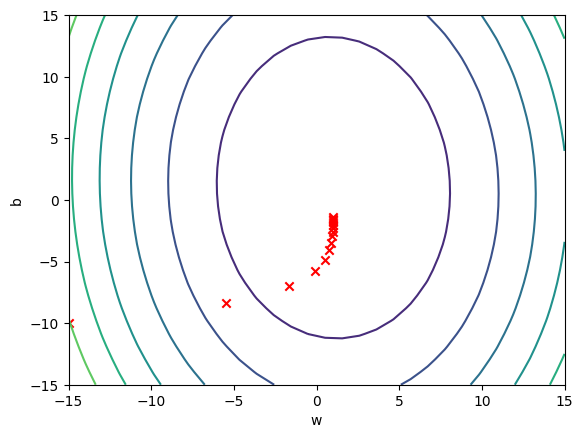

Text(38.347222222222214, 0.5, 'Cost')

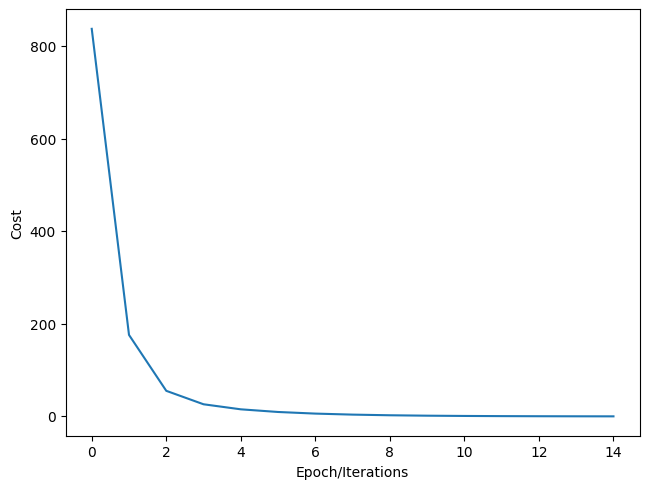

In [223]:
# Plot out the Loss Result
get_surface.final_plot()
# LOSS1=[ loss.detach().numpy() for loss in LOSS1]
plt.plot(LOSS1)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<Figure size 640x480 with 0 Axes>

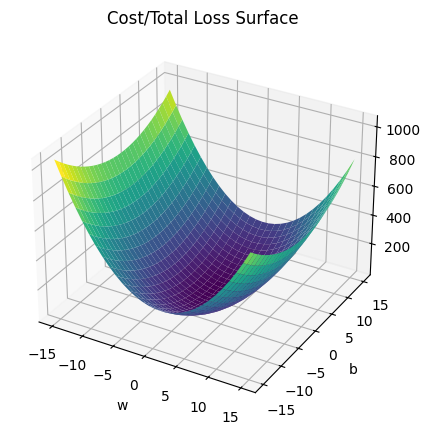

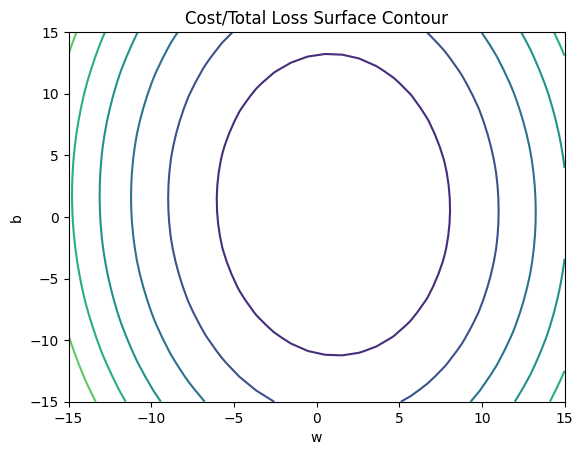

In [225]:
# Practice: train and plot the result with lr = 0.2 and the following parameters
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
lr=0.2
LOSS2=[]
get_surface2 = plot_error_surfaces(15, 15, X, y, 30)

In [226]:
# The function for training the model
def train_model(iter):
  # Loop
  for epoch in range(iter):

    # make a prediction
    yhat = forward(X)

    # calculate the loss
    loss = criterion(yhat, y)

    # Section for plotting
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    if epoch % 3 == 0:
      get_surface.plot_ps()

    # store the loss in the list LOSS
    LOSS2.append(loss.item())

    # backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()

    # update parameters slope and bias
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data

    # zero the gradients before running the backward pass
    w.grad.data.zero_()
    b.grad.data.zero_()

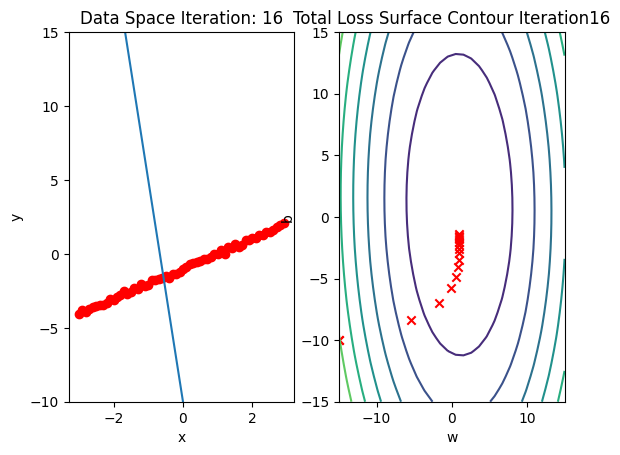

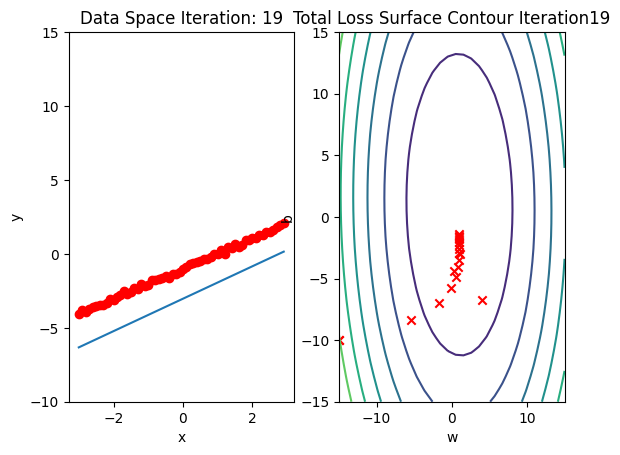

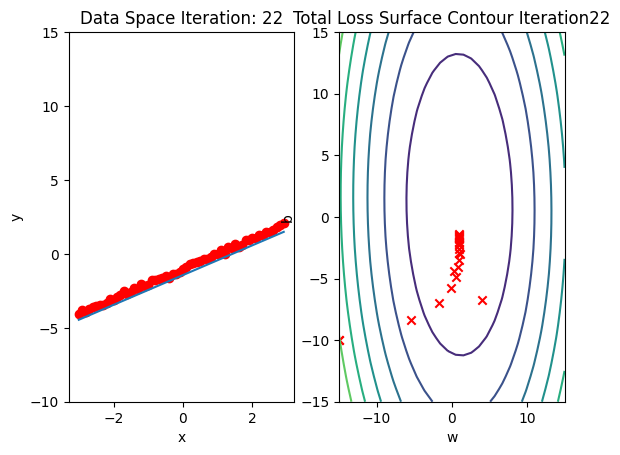

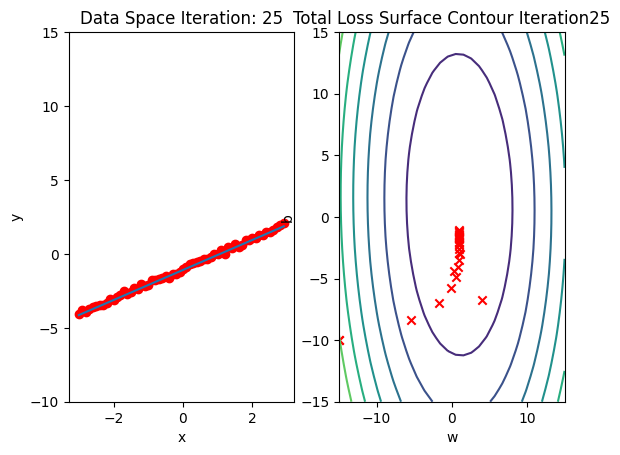

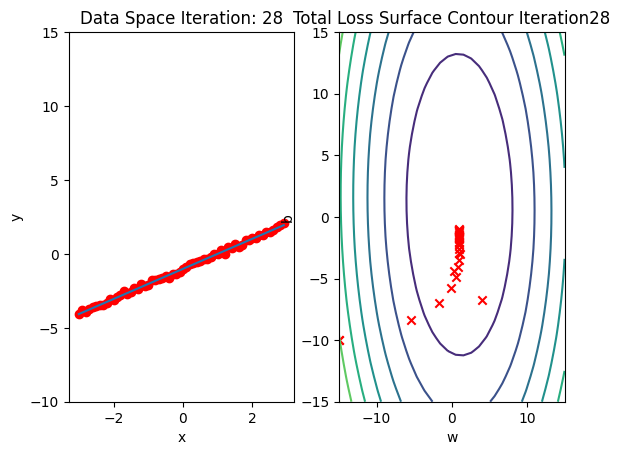

In [227]:
train_model(15)

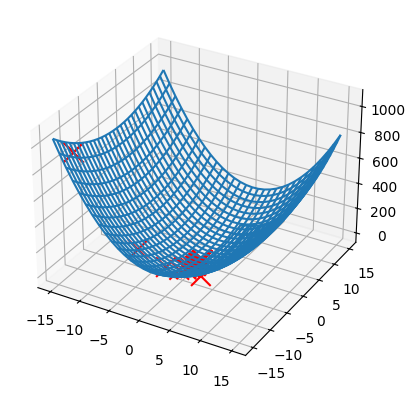

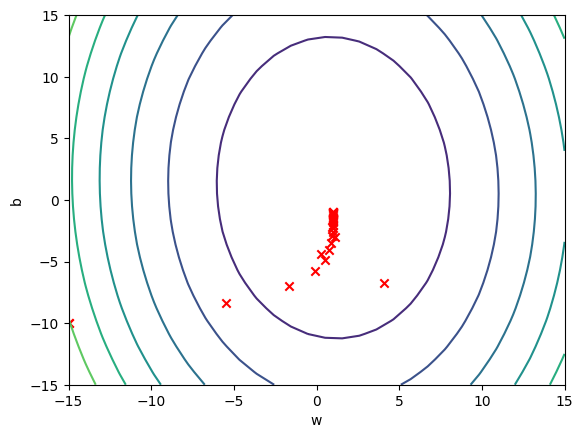

In [228]:
# Plot out the Loss Result
get_surface.final_plot()
# LOSS1=[ loss.detach().numpy() for loss in LOSS1]

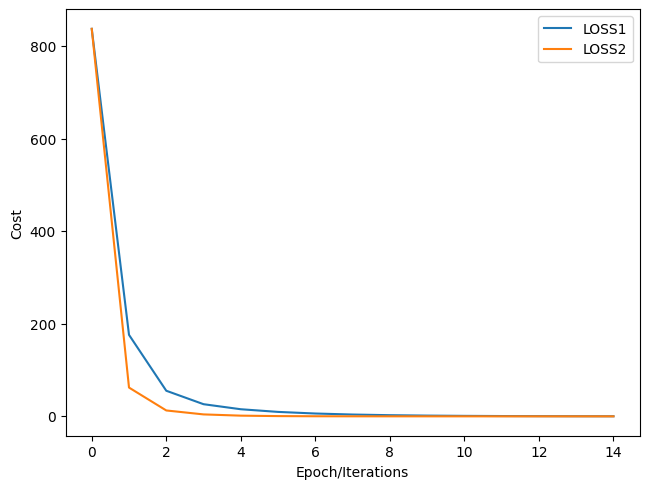

In [231]:
plt.plot(LOSS1, label="LOSS1")
plt.plot(LOSS2, label="LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()